Hello!

In [12]:
import xarray as xr
import intake
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [3]:
query = dict(
    variable_id=['tas'],
    table_id='Amon',
    experiment_id=['historical'],
    grid_label='gn',
    member_id='r1i1p1f1'
)

cat_subset = cat.search(require_all_on=["source_id"], **query)

dsets = cat_subset.to_dataset_dict(
    zarr_kwargs={'consolidated': True},
    storage_options={'token': 'anon'}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [23]:
#list(dsets)

In [17]:
CMIP_mean_temps = dsets["CMIP.NCAR.CESM2-WACCM.historical.Amon.gn"]["tas"].mean(dim=['lat', 'lon']).resample(time="YE").mean().values.ravel()

In [21]:
baseline_1850 = CMIP_mean_temps[0]
baseline_1850

277.2611

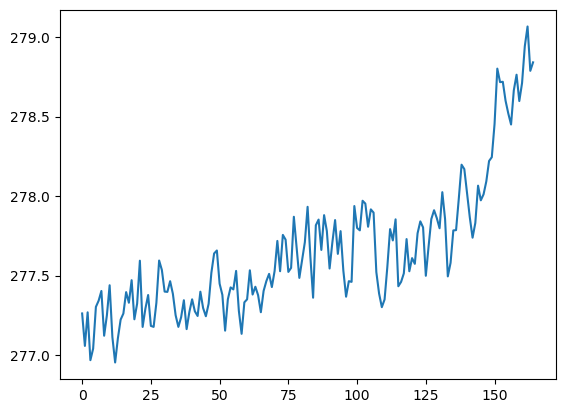

In [24]:
plt.plot(CMIP_mean_temps)
plt.show()

-3785486400000000000
1850-01-16 12:00:00
-3785486400000000000
1850-01-16 12:00:00
1850-01-16 12:00:00
-3785486400000000000
1850-01-16 12:00:00
1850-01-16 12:00:00
1850-01-16 12:00:00
-3785486400000000000
-3785486400000000000
1850-01-16 12:00:00
1850-01-16 12:00:00
-3785486400000000000
1850-01-16 12:00:00
-3785486400000000000
1850-01-17 00:00:00
-3785486400000000000
1850-01-15 12:00:00
1850-01-16 12:00:00
-1734350400000000000
1850-01-16 12:00:00
1850-01-16 12:00:00
1850-01-16 12:00:00
1850-01-15 12:00:00
1850-01-16 12:00:00
1850-01-16 12:00:00
1850-01-16 12:00:00
1850-01-16 12:00:00
-3785486400000000000
-3753950400000000000
1850-01-16 12:00:00
1850-01-15 12:00:00
1850-01-15 12:00:00
1850-01-16 12:00:00
1850-01-16 12:00:00


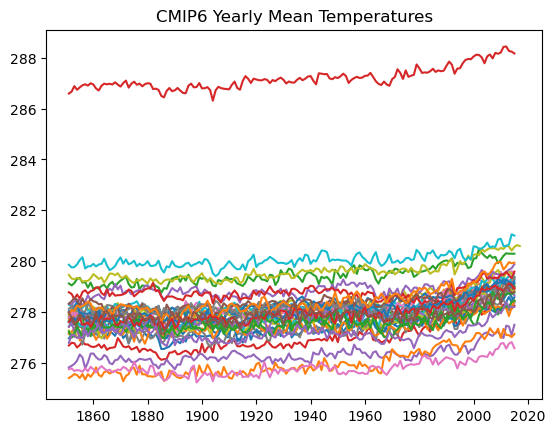

In [18]:
for dset_name in list(dsets):
    dset = dsets[dset_name]
    coords = list(dset.coords)
    print(dset.time.isel(time=0).item())
    if 'lat' in coords and 'lon' in coords:
        dset = dset.sortby("time")
        CMIP_mean_temps = dset["tas"].mean(dim=['lat', 'lon']).resample(time="YE").mean()
    elif 'i' in coords:
        CMIP_mean_temps = dset["tas"].mean(dim=['i']).resample(time="YE").mean()
    else:
        CMIP_mean_temps = dset["tas"].mean(dim=['latitude', 'longitude']).resample(time="YE").mean()
    
    years = np.array([t for t in CMIP_mean_temps.time.values])
    plt.plot(years, CMIP_mean_temps.values.ravel(), label=dset_name)
    
plt.title("CMIP6 Yearly Mean Temperatures")
plt.show()

In [30]:
list(dsets[dset].data_vars)

['tas', 'vertices_latitude', 'vertices_longitude']